In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from numpy.random import rand
from sklearn.utils import resample

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datafiles/combined_train.csv", header=None)
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datafiles/combined_test.csv", header=None)

In [4]:
#Finding the data size
print(train.shape)

(98466, 188)


In [5]:
#Finding the data types of the columns
train.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

In [6]:
#Getting the summary of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98466 entries, 0 to 98465
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 141.2 MB


In [7]:
#Displaying the unique classes in the dataset
train[187].unique()

array([0., 1., 2., 3., 4., 5., 6.])

In [8]:
#Finding the null values
count0 = train[0].isna().sum()
print("Number of null values for class 0: ",count0)
count1 = train[1].isna().sum()
print("Number of null values for class 1: ",count1)
count2 = train[2].isna().sum()
print("Number of null values for class 2: ",count2)
count3 = train[3].isna().sum()
print("Number of null values for class 3: ",count3)
count4 = train[4].isna().sum()
print("Number of null values for class 4: ",count4)
count5 = train[5].isna().sum()
print("Number of null values for class 3: ",count5)
count6 = train[6].isna().sum()
print("Number of null values for class 4: ",count6)

Number of null values for class 0:  0
Number of null values for class 1:  0
Number of null values for class 2:  0
Number of null values for class 3:  0
Number of null values for class 4:  0
Number of null values for class 3:  0
Number of null values for class 4:  0


In [9]:
#Summarizing data
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,...,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000,98466.000000
mean,0.899942,0.753996,0.421397,0.221492,0.201677,0.210970,0.207439,0.204157,0.201767,0.200301,...,0.004603,0.004244,0.003911,0.003579,0.003339,0.003135,0.002888,0.002643,0.002496,1.005829
std,0.229069,0.219353,0.229911,0.211889,0.181821,0.174129,0.178658,0.177228,0.172482,0.169543,...,0.042320,0.040389,0.038675,0.036748,0.035362,0.034427,0.032909,0.031107,0.030116,1.859856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.929648,0.665712,0.245322,0.048818,0.080357,0.088608,0.075758,0.069307,0.067885,0.071006,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.992318,0.818942,0.423077,0.166023,0.146635,0.158845,0.147541,0.148148,0.153459,0.151961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.908979,0.577001,0.340984,0.259259,0.285388,0.296970,0.295880,0.292551,0.286344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [10]:
#Fining the outliers
continous_features =   train[187].unique()
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            train.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(train[continous_features])

For the feature 0, No of Outliers is 13017
For the feature 1, No of Outliers is 5549
For the feature 2, No of Outliers is 0
For the feature 3, No of Outliers is 2527
For the feature 4, No of Outliers is 7452
For the feature 5, No of Outliers is 4710
For the feature 6, No of Outliers is 3685


In [11]:
#Removing the outliers
outliers(train[continous_features], drop=True)

Outliers from 0 feature removed
Outliers from 1 feature removed
Outliers from 2 feature removed
Outliers from 3 feature removed
Outliers from 4 feature removed
Outliers from 5 feature removed
Outliers from 6 feature removed


Count in each label: 
0.0    64065
5.0     6571
6.0     2967
1.0     1903
2.0     1669
4.0     1196
3.0      532
Name: 187, dtype: int64


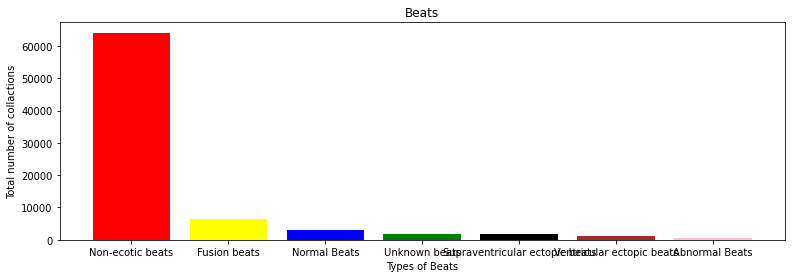

In [12]:
#Finding the number of classes present in the data 
label_names = ['Non-ecotic beats', 'Supraventricular ectopic beats', 'Ventricular ectopic beats', 'Fusion beats', 'Unknown beats', 'Abnormal Beats', 'Normal Beats']
labels = train[187]
print("Count in each label: ")
print(labels.value_counts())
color1 = ['red', 'yellow', 'blue', 'green', 'black', 'brown', 'pink']

plt.figure(figsize=(13,4))
plt.bar(list(set(label_names)), list(labels.value_counts()), color=color1, align='center')
plt.title('Beats')
plt.xlabel('Types of Beats')
plt.ylabel('Total number of collactions')
plt.show()


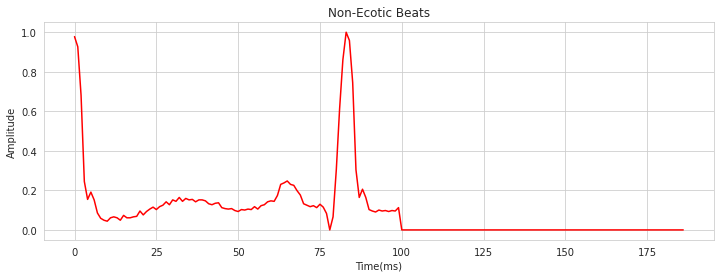

In [18]:
#ECG of non-ectopic beats 
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
plt.plot(train.iloc[0, 0:187], color='red', label="Non-Ectopic Beats")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.title("Non-Ecotic Beats")
plt.show()

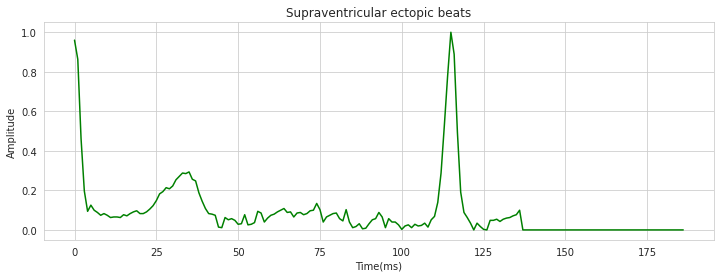

In [19]:
#ECG of Supraventricular ectopic Beats
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
plt.plot(train.iloc[1, 0:187], color='green', label="Supraventricular ectopic Beats")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.title("Supraventricular ectopic beats")
plt.show()

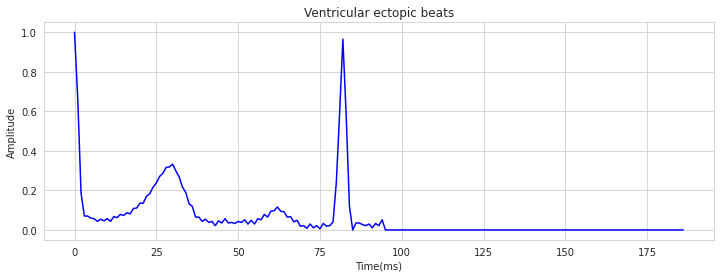

In [20]:
#ECG of Ventricular ectopic beats
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
plt.plot(train.iloc[2, 0:187], color='blue', label="Ventricular ectopic beats")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.title("Ventricular ectopic beats")
plt.show()

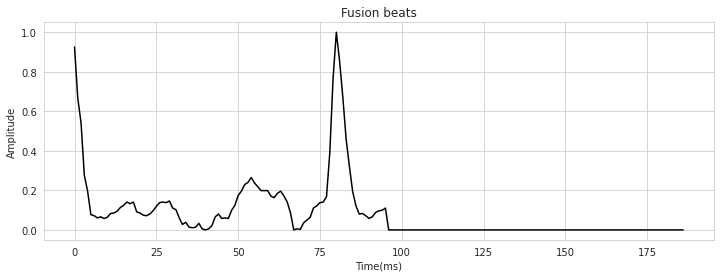

In [21]:
#ECG of Fusion Beats 
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
plt.plot(train.iloc[3, 0:187], color='black', label="Fusion beats")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.title("Fusion beats")
plt.show()

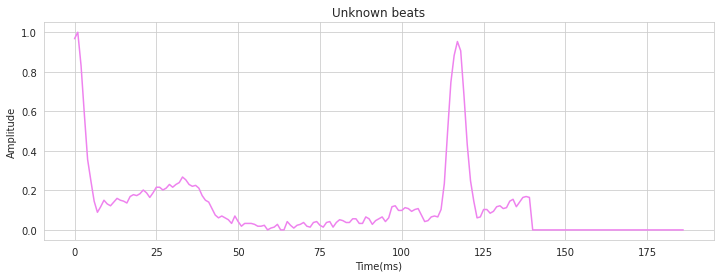

In [22]:
#ECG of unknown beats present in the data
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
plt.plot(train.iloc[4, 0:187], color='violet', label="Unknown beats")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.title("Unknown beats")
plt.show()

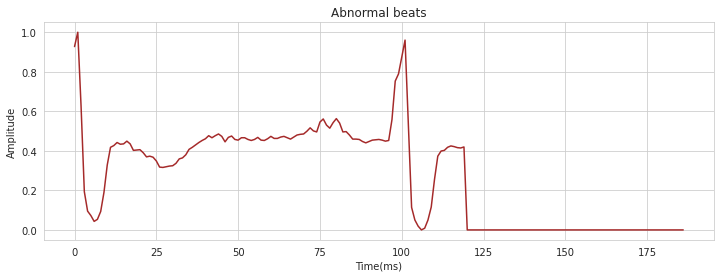

In [23]:
#ECG of Abnormal beats present in the data
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
plt.plot(train.iloc[5, 0:187], color='brown', label="Unknown beats")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.title("Abnormal beats")
plt.show()

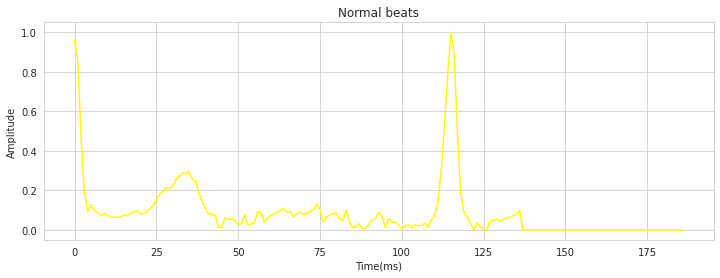

In [26]:
#ECG of Normal beats present in the data
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
plt.plot(train.iloc[1, 0:187], color='yellow', label="Unknown beats")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.title("Normal beats")
plt.show()

In [31]:
#Resampling the data
train_lbl0 = resample(train[train[187]==0], replace=True, n_samples=50000, random_state=113)
train_lbl1 = resample(train[train[187]==1], replace=True, n_samples=50000, random_state=113)
train_lbl2 = resample(train[train[187]==2], replace=True, n_samples=50000, random_state=113)
train_lbl3 = resample(train[train[187]==3], replace=True, n_samples=50000, random_state=113)
train_lbl4 = resample(train[train[187]==4], replace=True, n_samples=50000, random_state=113)
train_lbl5 = resample(train[train[187]==5], replace=True, n_samples=50000, random_state=113)
train_lbl6 = resample(train[train[187]==6], replace=True, n_samples=50000, random_state=113)

In [32]:
train1= pd.concat([train_lbl0, train_lbl1, train_lbl2, train_lbl3, train_lbl4, train_lbl5, train_lbl6])

labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())


Count in each label: 
0    64065
5     6571
6     2967
1     1903
2     1669
4     1196
3      532
Name: 187, dtype: int64


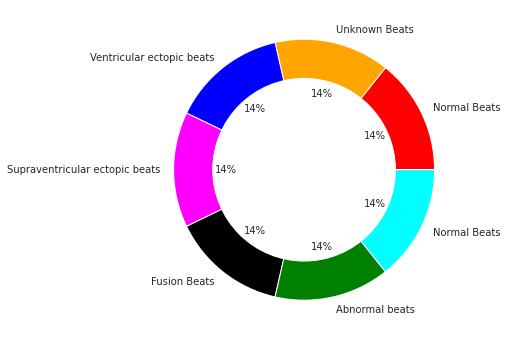

In [34]:
#Graph after resampling
plt.figure(figsize= (6,6))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train1[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats', 'Abnormal beats', 'Normal Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta', 'black', 'green','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Minimum :  0.8241379261016845
Q1      :  0.9630692005157471
Median  :  1.0
Q3      :  1.0
Maximum :  1.0


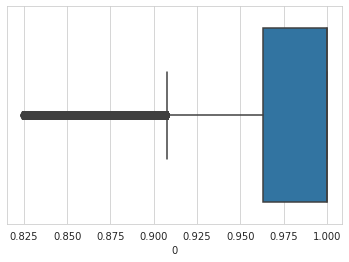

In [35]:
#5-number summary for the class 0
quartiles = percentile(train[0], [25, 50, 75])
data_min, data_max = train[0].min(), train[0].max()
print('Minimum : ', data_min)
print('Q1      : ', quartiles[0])
print('Median  : ', quartiles[1])
print('Q3      : ', quartiles[2])  
print('Maximum : ', data_max)

sns.set_style("whitegrid")
#Barplot for class 0
a0 = sns.boxplot(x=train[0], data=train)

Minimum :  0.3011583089828491
Q1      :  0.7351751327514648
Median  :  0.8388941884040833
Q3      :  0.9135480225086212
Maximum :  1.0


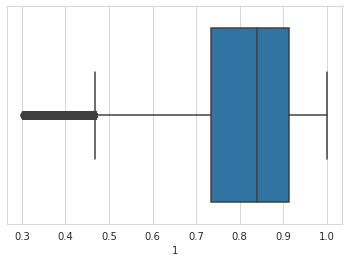

In [36]:
#5-number summary for the class 1
quartiles = percentile(train[1], [25, 50, 75])
data_min, data_max = train[1].min(), train[1].max()
print('Minimum : ', data_min)
print('Q1      : ', quartiles[0])
print('Median  : ', quartiles[1])
print('Q3      : ', quartiles[2])  
print('Maximum : ', data_max)

#Barplot for class 1
a1 = sns.boxplot(x=train[1], data=train)

Minimum :  0.0
Q1      :  0.24155217409133906
Median  :  0.4140625
Q3      :  0.5545023679733276
Maximum :  1.0


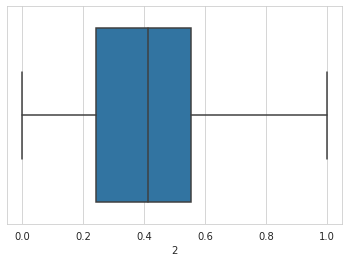

In [37]:
#5-number summary for the class 2
quartiles = percentile(train[2], [25, 50, 75])
data_min, data_max = train[2].min(), train[2].max()
print('Minimum : ', data_min)
print('Q1      : ', quartiles[0])
print('Median  : ', quartiles[1])
print('Q3      : ', quartiles[2])  
print('Maximum : ', data_max)

#Barplot for class 1
a1 = sns.boxplot(x=train[2], data=train)

Minimum :  0.0
Q1      :  0.0343839526176452
Median  :  0.1246006414294242
Q3      :  0.26731765270233154
Maximum :  0.7779141068458557


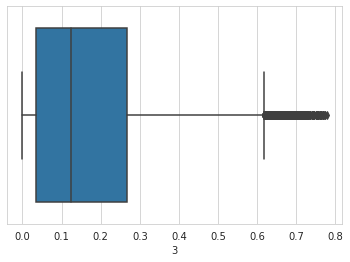

In [38]:
#5-number summary for the class 3
quartiles = percentile(train[3], [25, 50, 75])
data_min, data_max = train[3].min(), train[3].max()
print('Minimum : ', data_min)
print('Q1      : ', quartiles[0])
print('Median  : ', quartiles[1])
print('Q3      : ', quartiles[2])  
print('Maximum : ', data_max)

#Barplot for class 1
a1 = sns.boxplot(x=train[3], data=train)

Minimum :  0.0
Q1      :  0.073529414832592
Median  :  0.1294765770435333
Q3      :  0.20626391470432281
Maximum :  0.5275779366493225


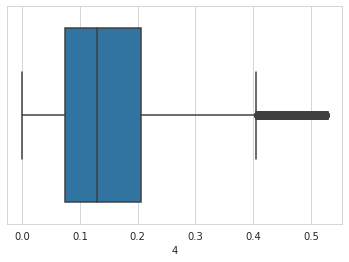

In [39]:
#5-number summary for the class 4
quartiles = percentile(train[4], [25, 50, 75])
data_min, data_max = train[4].min(), train[4].max()
print('Minimum : ', data_min)
print('Q1      : ', quartiles[0])
print('Median  : ', quartiles[1])
print('Q3      : ', quartiles[2])  
print('Maximum : ', data_max)

#Barplot for class 1
a1 = sns.boxplot(x=train[4], data=train)

Minimum :  0.0
Q1      :  0.0820668712258338
Median  :  0.1363636404275894
Q3      :  0.2249999940395355
Maximum :  0.5800293684005737


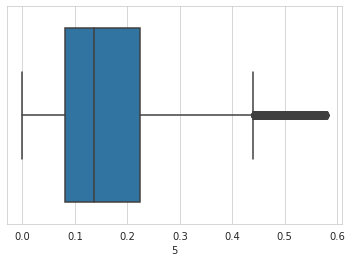

In [40]:
#5-number summary for the class 5
quartiles = percentile(train[5], [25, 50, 75])
data_min, data_max = train[5].min(), train[5].max()
print('Minimum : ', data_min)
print('Q1      : ', quartiles[0])
print('Median  : ', quartiles[1])
print('Q3      : ', quartiles[2])  
print('Maximum : ', data_max)

#Barplot for class 1
a1 = sns.boxplot(x=train[5], data=train)

Minimum :  0.0
Q1      :  0.069103043526411
Median  :  0.1276102066040039
Q3      :  0.2353733777999878
Maximum :  0.62861168384552


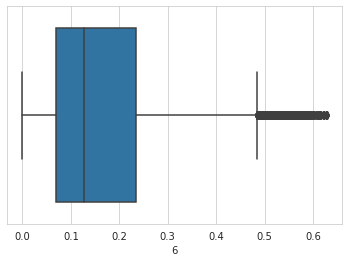

In [41]:
#5-number summary for the class 6
quartiles = percentile(train[6], [25, 50, 75])
data_min, data_max = train[6].min(), train[6].max()
print('Minimum : ', data_min)
print('Q1      : ', quartiles[0])
print('Median  : ', quartiles[1])
print('Q3      : ', quartiles[2])  
print('Maximum : ', data_max)

#Barplot for class 1
a1 = sns.boxplot(x=train[6], data=train)